Collect dataframes from all  participants and analyse

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

In [21]:
in_directory = './dataframes/'

In [3]:
! ls ./dataframes/

anghelescu_df.pkl    fleschner_df.pkl  nellesen_df.pkl	    wegner_df.pkl
burkhardt_df.pkl     junack_df.pkl     puder_df.pkl	    wendel_df.pkl
conle_df.pkl	     mettig_df.pkl     sucker_df.pkl
df_haubenreiser.pkl  mueller_df.pkl    wannenmacher_df.pkl


In [22]:
if not os.path.isfile('all_participants_data.pkl'):
    df = pd.DataFrame()
    for file in glob.glob(in_directory+'*.pkl'):
        print(file)
        df_tmp = pd.read_pickle(file)
        df = df.append(df_tmp)
    df.to_pickle('all_participants_data.pkl')
else:
    df = pd.read_pickle('all_participants_data.pkl')

./dataframes\anghelescu_df.pkl
./dataframes\burkhardt_df.pkl
./dataframes\conle_df.pkl
./dataframes\df_haubenreiser.pkl
./dataframes\fleschner_df.pkl
./dataframes\junack_df.pkl
./dataframes\mettig_df.pkl
./dataframes\mueller_df.pkl
./dataframes\nellesen_df.pkl
./dataframes\puder_df.pkl
./dataframes\wannenmacher_df.pkl
./dataframes\wegner_df.pkl
./dataframes\wendel_df.pkl


In [4]:
! pip list | grep pandas

Der Befehl "grep" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.


In [23]:
df.shape

(547, 35)

In [24]:
df.head()

,valence,speaker,sex,duration,meanF0Hz,stdevF0Hz,HNR,localJitter,localabsoluteJitter,rapJitter,...,f4_median,pF,fdisp,avgFormant,mff,fitch_vtl,delta_f,vtl_delta_f,JitterPCA,ShimmerPCA
file,,,,,,,,,,,,,,,,,,,,,
Angehelescu_16_seg_00000000.wav,4.0,irina,female,4.28,253.775735,21.862605,9.477288,0.020626,0.000081,0.011053,...,3890.653335,0.034499,1128.602727,2189.947411,1724.099350,16.258670,1100.541549,15.901262,NaN,NaN
Angehelescu_16_seg_00000001.wav,4.0,irina,female,5.96,230.974964,39.822558,9.240131,0.024346,0.000106,0.012157,...,3865.271638,0.197979,1096.403603,2208.987168,1788.838185,15.664861,1099.272751,15.919616,NaN,NaN
Angehelescu_16_seg_00000002.wav,4.0,irina,female,6.96,217.720590,40.656277,11.302664,0.017945,0.000082,0.008597,...,3863.210498,-0.734963,1124.081020,2132.891562,1672.220935,16.765487,1076.734110,16.252852,NaN,NaN
Angehelescu_16_seg_00000003.wav,4.0,irina,female,6.96,223.013685,40.045658,10.033796,0.016122,0.000072,0.007982,...,3889.489510,0.230677,1098.321195,2211.255038,1798.267563,15.587988,1100.690985,15.899104,NaN,NaN
Angehelescu_16_seg_00000004.wav,3.0,irina,female,1.66,232.001187,25.032989,14.639509,0.014489,0.000063,0.007420,...,3878.346306,0.210506,1122.512046,2203.411591,1740.302593,16.106597,1104.395672,15.845770,NaN,NaN


In [25]:
df.speaker.unique()

array(['irina', 'felix', 'lena', 'luise', 'saskia', 'lea', 'alicia',
       'nina', 'jannis', 'Carolin-Antonia', 'sophie', 'lisa', 'tobias'],
      dtype=object)

<AxesSubplot:>

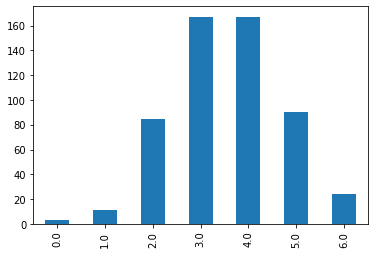

In [26]:
df.valence.value_counts().sort_index().plot(kind='bar')

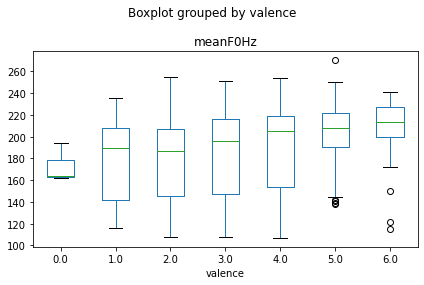

In [27]:
df.boxplot(by ='valence', column ='meanF0Hz', grid = False)
plt.tight_layout()

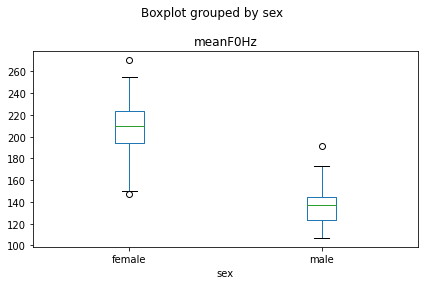

In [10]:
df.boxplot(by ='sex', column ='meanF0Hz', grid = False)
plt.tight_layout()

In [ ]:
df.head()

In [11]:
df.isnull().values.any()
# da sind null values dabei die machen probleme bei berechnungen deswegen sind die rausgenommen

True

index = df['duration'].index[df['duration'].apply(np.isnan)]
df['speaker'][index[60]]

In [12]:
len(index)

NameError: name 'index' is not defined

In [28]:
check_for_nan = df['speaker'].isnull()
print (check_for_nan) 

file
Angehelescu_16_seg_00000000.wav    False
Angehelescu_16_seg_00000001.wav    False
Angehelescu_16_seg_00000002.wav    False
Angehelescu_16_seg_00000003.wav    False
Angehelescu_16_seg_00000004.wav    False
                                   ...  
Wendel_16_seg_00000007.wav         False
Wendel_16_seg_00000009.wav         False
Wendel_16_seg_00000026.wav         False
Wendel_16_seg_00000036.wav         False
Wendel_16_seg_00000037.wav         False
Name: speaker, Length: 547, dtype: bool


In [29]:
# replace NANs with mean value
for i, col in enumerate(df.iloc[:,3:].columns):
    if np.isnan(df[col]).any():
        print()
        print('{} includes {} nan, I\'ll insert mean values'.format(col, df[col].isna().sum())) # wenn nan ist fülle es mit dem wert und das als neues pickle abgespeichert
        df[col] = df[col].fillna(df[col].mean())
df.to_pickle('all_participants_nonan.pkl')


apq3Shimmer includes 1 nan, I'll insert mean values

apq5Shimmer includes 1 nan, I'll insert mean values

apq11Shimmer includes 3 nan, I'll insert mean values

ddaShimmer includes 1 nan, I'll insert mean values

pF includes 41 nan, I'll insert mean values

fdisp includes 41 nan, I'll insert mean values

avgFormant includes 41 nan, I'll insert mean values

mff includes 41 nan, I'll insert mean values

fitch_vtl includes 41 nan, I'll insert mean values

delta_f includes 41 nan, I'll insert mean values

vtl_delta_f includes 41 nan, I'll insert mean values

JitterPCA includes 101 nan, I'll insert mean values

ShimmerPCA includes 101 nan, I'll insert mean values


c:\users\user\s_sprechstile_eigene\venv\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


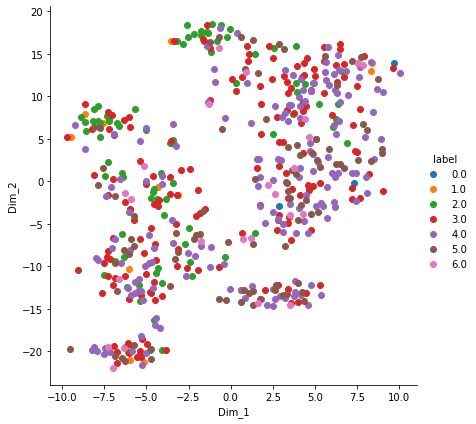

In [30]:
# Plot a TSNE
def plotTsne(feats, labels, perplexity=30, learning_rate=200):
    model = TSNE(n_components=2, random_state=0, perplexity=perplexity, learning_rate=learning_rate)
    tsne_data = model.fit_transform(feats)
    tsne_data_labs = np.vstack((tsne_data.T, labels)).T
    tsne_df = pd.DataFrame(data=tsne_data_labs, columns=('Dim_1', 'Dim_2', 'label'))
    sns.FacetGrid(tsne_df, hue='label', size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
    plt.show()
plotTsne(df.iloc[:,3:], df['valence'], 60, 200)

### Discretize the label

In [31]:
df = pd.read_pickle('all_participants_nonan.pkl')

In [32]:
# discretzie valence with border between 3 and 4
df.insert(1, 'val_bin', -1)
df['val_bin'] = np.digitize (df.valence.values, [0,4,7])-1 # spalte val-bin iengefügt und mit -1 gefüllt und dann soll sie gefüllt werden

In [33]:
df.head()

,valence,val_bin,speaker,sex,duration,meanF0Hz,stdevF0Hz,HNR,localJitter,localabsoluteJitter,...,f4_median,pF,fdisp,avgFormant,mff,fitch_vtl,delta_f,vtl_delta_f,JitterPCA,ShimmerPCA
file,,,,,,,,,,,,,,,,,,,,,
Angehelescu_16_seg_00000000.wav,4.0,1,irina,female,4.28,253.775735,21.862605,9.477288,0.020626,0.000081,...,3890.653335,0.034499,1128.602727,2189.947411,1724.099350,16.258670,1100.541549,15.901262,-0.009108,-0.003013
Angehelescu_16_seg_00000001.wav,4.0,1,irina,female,5.96,230.974964,39.822558,9.240131,0.024346,0.000106,...,3865.271638,0.197979,1096.403603,2208.987168,1788.838185,15.664861,1099.272751,15.919616,-0.009108,-0.003013
Angehelescu_16_seg_00000002.wav,4.0,1,irina,female,6.96,217.720590,40.656277,11.302664,0.017945,0.000082,...,3863.210498,-0.734963,1124.081020,2132.891562,1672.220935,16.765487,1076.734110,16.252852,-0.009108,-0.003013
Angehelescu_16_seg_00000003.wav,4.0,1,irina,female,6.96,223.013685,40.045658,10.033796,0.016122,0.000072,...,3889.489510,0.230677,1098.321195,2211.255038,1798.267563,15.587988,1100.690985,15.899104,-0.009108,-0.003013
Angehelescu_16_seg_00000004.wav,3.0,0,irina,female,1.66,232.001187,25.032989,14.639509,0.014489,0.000063,...,3878.346306,0.210506,1122.512046,2203.411591,1740.302593,16.106597,1104.395672,15.845770,-0.009108,-0.003013


<AxesSubplot:>

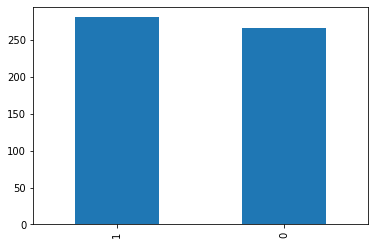

In [34]:
df.val_bin.value_counts().plot(kind ='bar')

c:\users\user\s_sprechstile_eigene\venv\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


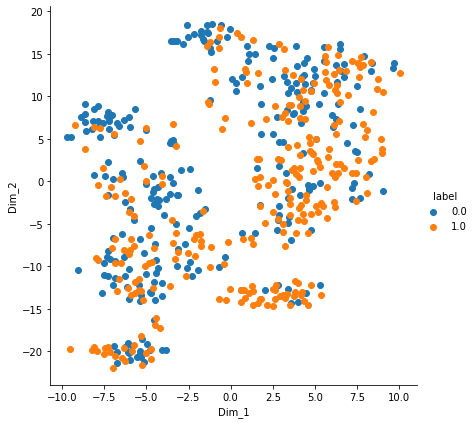

In [35]:
plotTsne(df.iloc[:,4:], df['val_bin'], 60, 200)